In [1]:
%matplotlib inline

In [2]:
import poppy as pop
import numpy as np
import matplotlib.pyplot as plt
import poputils as mepop

In [3]:
import os,sys
sys.path.insert(1, os.path.join(sys.path[0], '../Utils'))
import plot as meplot
sys.path.remove(os.path.join(sys.path[0], '../Utils'))

In [4]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['image.origin'] = True

## **Parameters**

In [5]:
wvlgth = 1e-6 #666e-9  

rad_tel = 1.2/2      
focal = 18*(2*rad_tel)

rad_obs = 0.3/2                                             # obscuration ratio
nb_spid = 4                                                  # [m]
spid_width = 0.05                                            # [m]

print('Wavelength = {} m'.format(wvlgth))
print('Aperture = {} m'.format(2*rad_tel))
print('Focal length = {x:.3f} m \n'.format(x=focal))
print('Fresnel number = {x:.3f}'.format(x=(2*rad_tel)**2/(wvlgth*focal)))

Wavelength = 1e-06 m
Aperture = 1.2 m
Focal length = 21.600 m 

Fresnel number = 66666.667


## **Aperture Auxtel (spiders + central obscuration)**

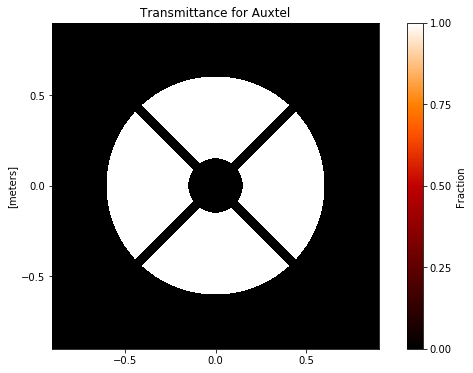

In [6]:
final_ap = mepop.make_aperture(rad_obs, nb_spid, spid_width, rad_tel, 
                               showimg=True, rotation=45)

## **Zernike**

In [7]:
shift = 0.0003                                 # Longitudinal displacement [m]
pixsize = 0.01#0.1                                # Unit: micron/pixel
fov = 2.0                                    # microns 

## **Sampling**

To modelize sampling, a detector is added with `osys.add_detector` with a pixel size `pixsize` (0.1 micron)

---
In HCIPy, the equivalent is the `focal_grid` with `sampl_focal` (and 8 pixels per λ/D)

In [8]:
pix_per_diff_width = (wvlgth/(2*rad_tel))/(pixsize*10**-6)
print('There is {} pixels per diffraction width'.format(pix_per_diff_width))

There is 83.33333333333333 pixels per diffraction width


## **PSF of aperture**
Fraunhofer propagation.

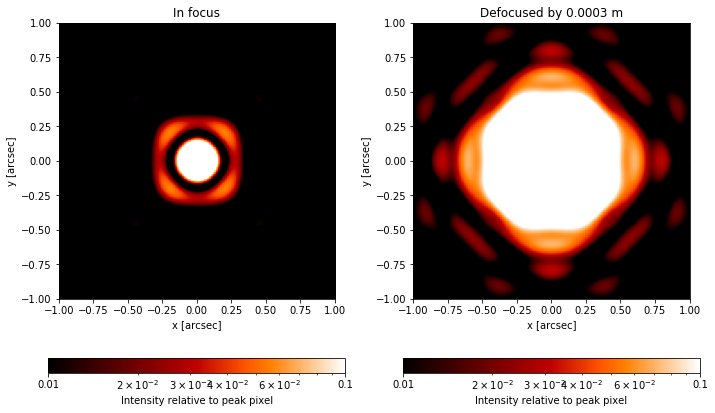

In [9]:
psf_1 = mepop.make_psf(final_ap, focal, wvlgth, rad_tel, pixsize, fov, 
                     shift=0, showimg=False, logscale=True, showsteps=False)

psf_2 = mepop.make_psf(final_ap, focal, wvlgth, rad_tel, pixsize, fov, 
                       shift=shift, showimg=False, logscale=True, showsteps=False)

mepop.foc_VS_defoc_img(psf_1, psf_2, shift, 
                     logscale=True, normalised=True)

## **PSF in 2D (slice or sum)**

In [10]:
int_map_1 = psf_1[0].data
int_map_2 = psf_2[0].data

halffov_x_1 = pixsize * int_map_1.shape[1] / 4.0 
xaxis_1 = np.linspace(-halffov_x_1,halffov_x_1,np.shape(int_map_1)[1])

halffov_x_2 = pixsize * int_map_2.shape[1] / 4.0  
xaxis_2 = np.linspace(-halffov_x_2,halffov_x_2,np.shape(int_map_2)[1])

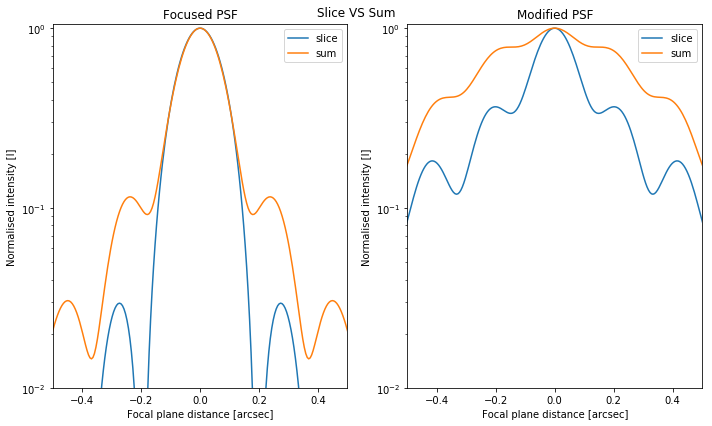

In [11]:
meplot.slicum_for_focdefoc(int_map_1, int_map_2, xaxis_1, xaxis_2, 
                      logscale=True, normalised=True, ymin=10**-2, xmin=-0.5, xmax=0.5)

meplot.slicum_for_focdefoc(int_map_1, int_map_2, xaxis_1, xaxis_2, 
                      logscale=True, normalised=True, ymin=10**-2, xmin=-1, xmax=1)

meplot.foc_VS_defoc(int_map_1/int_map_1.max(), int_map_2/int_map_1.max(), xaxis_1, xaxis_2, 
                  logscale=True, normalised=False, wantslice=True, ymin=10**-2, xmin=-1, xmax=1)

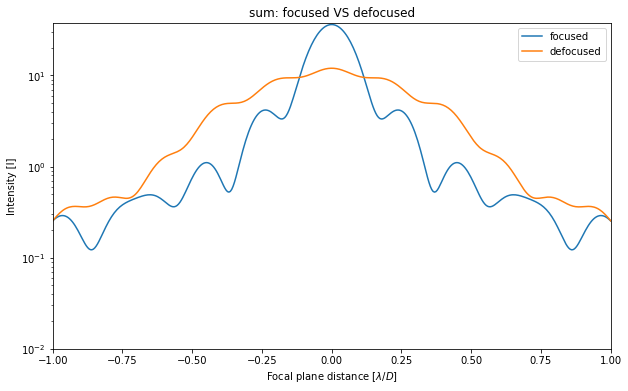

In [12]:
meplot.foc_VS_defoc(int_map_1/int_map_1.max(), int_map_2/int_map_1.max(), xaxis_1, xaxis_2, 
                  logscale=True, normalised=False, wantslice=False, ymin=10**-2, xmin=-1, xmax=1)